# Intro to D4M

You can install PyD4M by cloning git repo linked to at http://d4m.mit.edu/download and executing `python setup.py install`. To load the D4M package, execute the following command:

In [11]:
from D4M.assoc import *

import warnings; warnings.simplefilter('ignore')

D4M is a package for working with Associative Arrays. An Associative Array is a bit like a sparse matrix, but the rows, columns, and values can be either numbers or strings.

In [12]:
row = 'a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,';
column = 'a,aa,aaa,b,bb,bbb,a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,';
values = 'a-a,a-aa,a-aaa,a-b,a-bb,a-bbb,a-a,aa-a,aaa-a,b-a,bb-a,bbb-a,a-a,aa-aa,aaa-aaa,b-b,bb-bb,bbb-bbb,';

A = Assoc(row,column,values);

print("\nThis is an Associative Array with string values:")
A.printfull()

print("\nThis is an Associative Array with numeric values:")
A = A.logical()
A.printfull()


This is an Associative Array with string values:
         a     aa      aaa    b     bb      bbb
a      a-a   a-aa    a-aaa  a-b   a-bb    a-bbb
aa    aa-a  aa-aa                              
aaa  aaa-a         aaa-aaa                     
b      b-a                  b-b                
bb    bb-a                       bb-bb         
bbb  bbb-a                              bbb-bbb

This is an Associative Array with numeric values:
       a aa aaa  b bb bbb
a    1.0  1   1  1  1   1
aa   1.0  1              
aaa  1.0      1          
b    1.0         1       
bb   1.0            1    
bbb  1.0                1


In [13]:
print(A)

Row indices: ['a' 'aa' 'aaa' 'b' 'bb' 'bbb']
Column indices: ['a' 'aa' 'aaa' 'b' 'bb' 'bbb']
Values: 1.0
Adjacency array: 
[[1 1 1 1 1 1]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [1 0 0 1 0 0]
 [1 0 0 0 1 0]
 [1 0 0 0 0 1]]


With Associative Arrays, you can extract a subgraph by indexing into the Associative Array. For example, let's just get all the columns with odd vertices and rows with vertices 1-3.

Note the last character in an index string is the delimiter, this allows us to do indexing on multiply values with a single string, as cell arrays of strings can get very slow.

In [14]:
print("\nGet columns/vertices a, aaa, and bb:")
A[:,'a,aaa,bb,'].printfull()
print("\nGet rows/vertices a through aaa:")
A['a,:,aaa,',:].printfull()


Get columns/vertices a, aaa, and bb:
       a aaa bb
a    1.0   1  1
aa   1.0       
aaa  1.0   1   
b    1.0       
bb   1.0      1
bbb  1.0       

Get rows/vertices a through aaa:
       a aa aaa  b bb bbb
a    1.0  1   1  1  1   1
aa   1.0  1              
aaa  1.0      1          


We can also add, subtract, and mutliply Associative Arrays.

In [15]:
print("\nAddition: A + A[:,'a,aaa,bb,']:")
(A + A[:,'a,aaa,bb,']).printfull()

print("\nSubtraction: A - A['a,:,aaa,',:]:")
(A - A['a,:,aaa,',:]).condense().printfull()

print("\nElement-wise multiply: A * A[:,'aa,b,']:")
(A * A[:,'aa,b,']).printfull()

print("\nMatrix multiply: A.multiply(A[:,'aa,b,']):")
A.multiply(A[:,'aa,b,']).printfull()


Addition: A + A[:,'a,aaa,bb,']:
       a aa aaa  b bb bbb
a    2.0  1   2  1  2   1
aa   2.0  1              
aaa  2.0      2          
b    2.0         1       
bb   2.0            2    
bbb  2.0                1

Subtraction: A - A['a,:,aaa,',:]:
       a  b bb bbb
b    1.0  1       
bb   1.0     1    
bbb  1.0         1

Element-wise multiply: A * A[:,'aa,b,']:
     aa  b
a     2  2
aa    2  1
aaa   1  1
b     1  2
bb    1  1
bbb   1  1

Matrix multiply: A.multiply(A[:,'aa,b,']):
   aa  b
a   1  1
aa  1   
b      1


We can read in a csv file of data.

In [16]:
E = readcsv("data/entity.csv")

E[0:9,:].printfull()

                    doc       entity     position      type
1    19960825_13108.txt  addis ababa  54;132;974;  LOCATION
2    19960930_84704.txt  addis ababa          60;  LOCATION
3    19961004_96087.txt  addis ababa      61;305;  LOCATION
4    19961006_98377.txt  addis ababa          68;  LOCATION
5   19961009_104796.txt  addis ababa      59;443;  LOCATION
6   19961010_107656.txt  addis ababa          61;  LOCATION
7   19961031_158809.txt  addis ababa        2109;  LOCATION
8   19961101_159647.txt  addis ababa        1485;  LOCATION
9   19961113_185784.txt  addis ababa          62;  LOCATION
10    19960821_6808.txt         aden         212;  LOCATION


Let's make E sparse.

In [17]:
row, col, doc = E[:,'doc,'].find()
row, col, entity = E[:,'entity,'].find()
row, col, position = E[:,'position,'].find()
row, col, rowType = E[:,'type,'].find()
typeEntity = catstr(rowType,'|',entity)

E = Assoc(doc,typeEntity,position)

print(E[0:1,:])
E[0:2,:].transpose().printfull()

Row indices: ['19960820_2304.txt' '19960820_2324.txt']
Column indices: ['LOCATION|britain' 'LOCATION|england' 'LOCATION|london'
 'LOCATION|united states' 'LOCATION|washington' 'PERSON|arshad mohammed'
 'PERSON|eddie george' 'PERSON|kenneth clarke' 'TIME|1996-08-20'
 'TIME|1997-09-01']
Values: ['1280;' '1636;' '167;853;1808;' '1;' '55;' '59;' '755;' '76;' '77;']
Adjacency array: 
[[0 0 0 4 5 9 0 0 4 7]
 [8 3 6 0 0 0 1 2 4 0]]
                       19960820_2304.txt 19960820_2324.txt 19960820_2344.txt
LOCATION|britain                                       76;              335;
LOCATION|england                             167;853;1808;                  
LOCATION|europe                                                   1215;1638;
LOCATION|germany                                                       1138;
LOCATION|ireland                                                        347;
LOCATION|london                                        59;               43;
LOCATION|united states          

We can use the sparse data to create an adjacency matrix and visualize it with a spy plot.

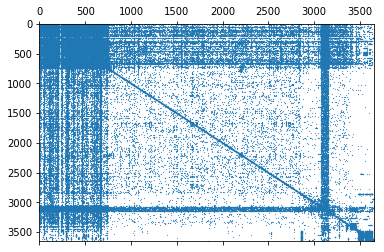

In [18]:
E = E.logical()
(E.transpose()*E).spy()

At this point we may want to do some analytics, or store our data in a database for later.